# 1.

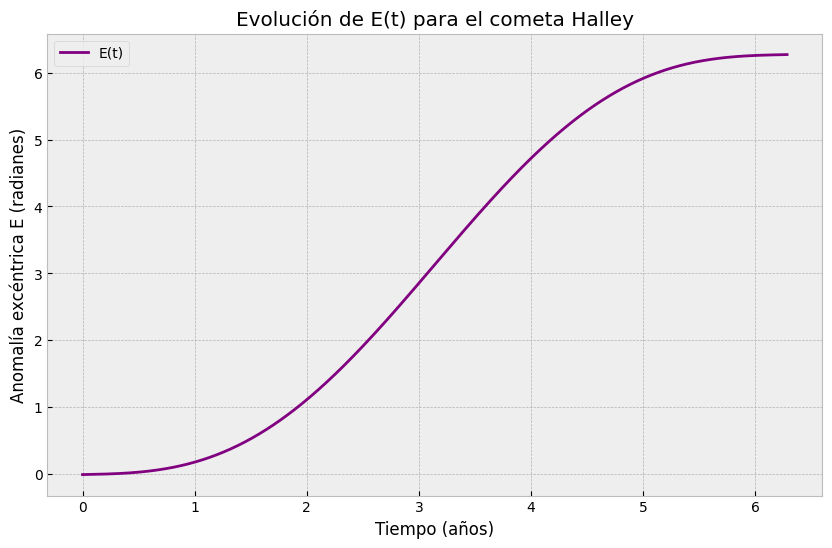

In [147]:
import numpy as np
import matplotlib.pyplot as plt

t = round(50 *(1/360), 4) + 1986.1113
t0 = 1986.1113
T = 75.96000
e = 0.9672671


def M(T):
    return 2 * np.pi * (t - t0) / T

M_v = M(T)

def anomalia_exc(E):
    return E - e*np.sin(E) - M_v

e_vals = np.linspace(0,  2*np.pi, 500)

plt.figure(figsize=(10, 6))
plt.plot(e_vals, anomalia_exc(e_vals), label='E(t)', color='purple')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalía excéntrica E (radianes)')
plt.title('Evolución de E(t) para el cometa Halley')
plt.legend()


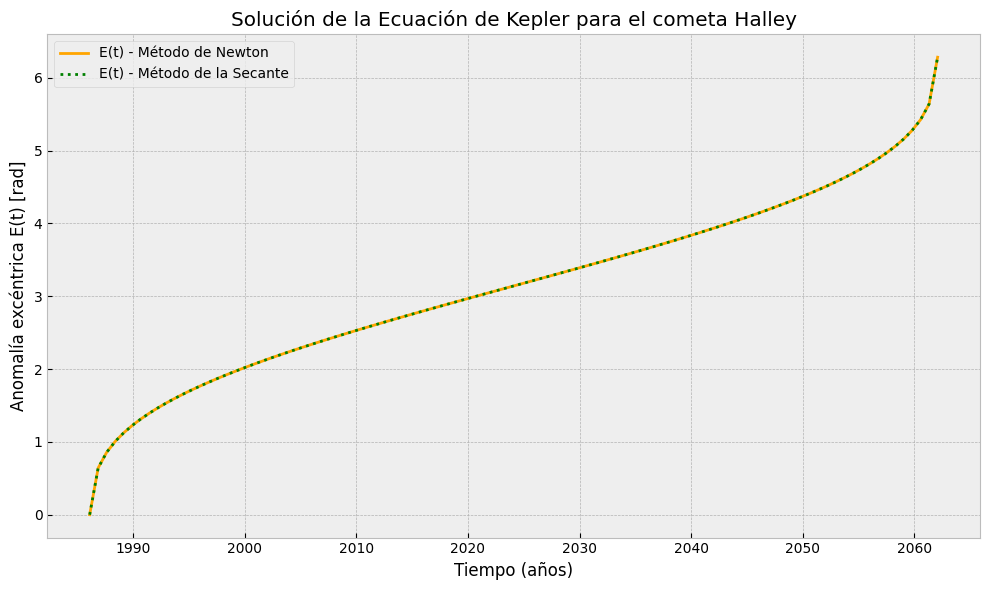

In [152]:
e = 0.9672671
T = 75.96
t = round(50 *(1/360), 4) + 1986.1113
t0 = 1986.1113
N = 100
dt = T / N

def newton(M_val, e, tol=1e-10, max_iter=100):
    E = M_val
    for _ in range(max_iter):
        f = E - e * np.sin(E) - M_val
        f_prime = 1 - e * np.cos(E)
        E_new = E - f / f_prime
        if abs(E_new - E) < tol:
            return E_new
        E = E_new
    return E

def secante(M_val, e, tol=1e-10, max_iter=100):
    E0 = M_val
    E1 = M_val + 0.1
    for _ in range(max_iter):
        f0 = E0 - e * np.sin(E0) - M_val
        f1 = E1 - e * np.sin(E1) - M_val
        if abs(f1 - f0) < 1e-14:
            return E1
        E2 = E1 - f1 * (E1 - E0) / (f1 - f0)
        if abs(E2 - E1) < tol:
            return E2
        E0, E1 = E1, E2
    return E1

t_vals = np.array([t0 + i * dt for i in range(N + 1)])
E_newton = [0]
E_secante = [0] 

for i in range(1, len(t_vals)):
    m_val = M(t_vals[i])
    E_newton.append(newton(m_val, e))
    E_secante.append(secante(m_val, e))


plt.figure(figsize=(10, 6))
plt.plot(t_vals, E_newton, label='E(t) - Método de Newton', color='orange')
plt.plot(t_vals, E_secante, label='E(t) - Método de la Secante', color='green', linestyle=':')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalía excéntrica E(t) [rad]')
plt.title('Solución de la Ecuación de Kepler para el cometa Halley')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 2.

In [154]:
T = 0.5
f = lambda m, T: np.tanh(m/T) - m

print('Vamos a calcular la magnetizacion reducida para una temperatura de 0.5')

def secante(f, x1, x2, T, maxiter=1000, tol=1e-8):
    for i in range(maxiter):
        f1, f2 = f(x1, T), f(x2, T)
        if abs(f2 - f1) < tol:
            return x2  # evita división por cero
        f_nueva = x2 - ((f2*(x2-x1))/(f2-f1))
        if abs(f_nueva-x2) < tol:
            return round(f_nueva,4)
        x1, x2 = x2, f_nueva
    raise ValueError(f'No converge despues de {maxiter} iterations')

print('Método de la Secante     :', secante(f, 0.1, 0.9, T))

df = lambda m: ((1/T) * (1/np.cosh(m/T)**2)) - 1

def newton_raphson(f, x1, T, maxiter=100, tol=1e-8):
    for i in range(maxiter):
        f1 = f(x1, T)
        df1 = df(x1)
        x_nuevo = x1 - f1/df1
        if abs(x1 - x_nuevo) < tol:
            return round(x_nuevo,4)
        x1 = x_nuevo
    raise ValueError(f'No converge despues de {maxiter} iterations')

print('Método de Newton-Raphson :', newton_raphson(f, 0.5,T))

f_2 = lambda m, T: np.tanh(m/T)

def punto_fijo(f, x1, T, maxiter=10000, tol=1e-8):
    for i in range(maxiter):
        x_nueva = f(x1, T)
        if abs(x1 - x_nueva) < tol:
            return round(x_nueva, 4)
        x1 = x_nueva
    raise ValueError(f'No converge despues de {maxiter} iterations')

print('Método de Punto Fijo     :', punto_fijo(f_2, 0.5, T))

Vamos a calcular la magnetizacion reducida para una temperatura de 0.5
Método de la Secante     : 0.9575
Método de Newton-Raphson : 0.9575
Método de Punto Fijo     : 0.9575


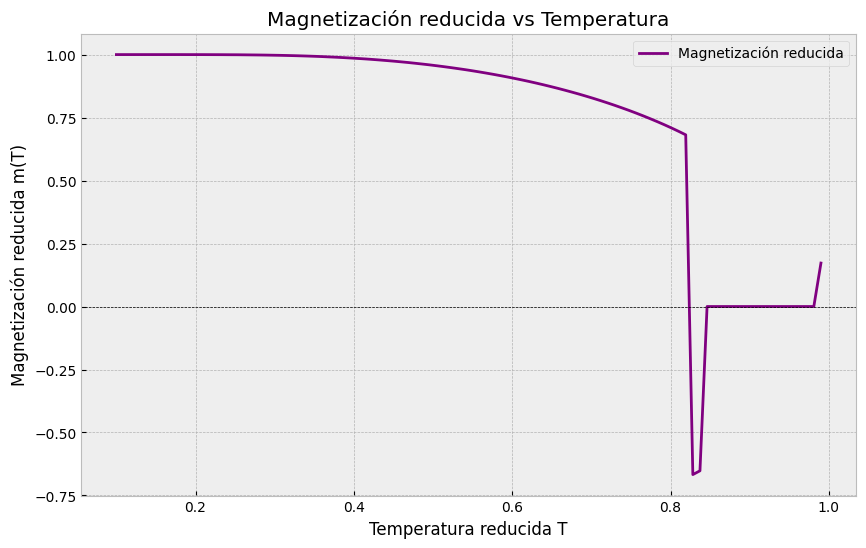

In [157]:
T = np.linspace(0.1,0.99,100)
magnetizacion = []
for t in T:
    m = secante(f, 0.1, 0.9, t)
    magnetizacion.append(m)

plt.style.use('bmh')
plt.figure(figsize=(10, 6))
plt.plot(T, magnetizacion, label = 'Magnetización reducida', color='purple')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.xlabel('Temperatura reducida T')
plt.ylabel('Magnetización reducida m(T)')
plt.title('Magnetización reducida vs Temperatura')
plt.legend()
plt.show()

# 3.

In [160]:
R = 8.314
T0 = 4.444
G = - 10**5
e_gibbs = lambda T:  R*T*np.log((T/T0)**(5/2)) + G
def secante(f, x1, x2, maxiter=1000, tol=1e-8):
    for i in range(maxiter):
        f1, f2 = f(x1), f(x2)
        if abs(f2 - f1) < tol:
            return ValueError(f'Diferencia muy pequeña en f(x), no converge')  # evita dividir por cero
        f_nueva = x2 - ((f2*(x2-x1))/(f2-f1))
        if abs(f_nueva-x2) < tol:
            return f_nueva
        x1, x2 = x2, f_nueva
    raise ValueError(f'No converge despues de {maxiter} iterations')

solucion = secante(e_gibbs, 1, 5)

print(f"La temperatura T que satisface G = -105 J es aproximadamente: {solucion:.4f} K")


La temperatura T que satisface G = -105 J es aproximadamente: 904.9743 K


# 4.

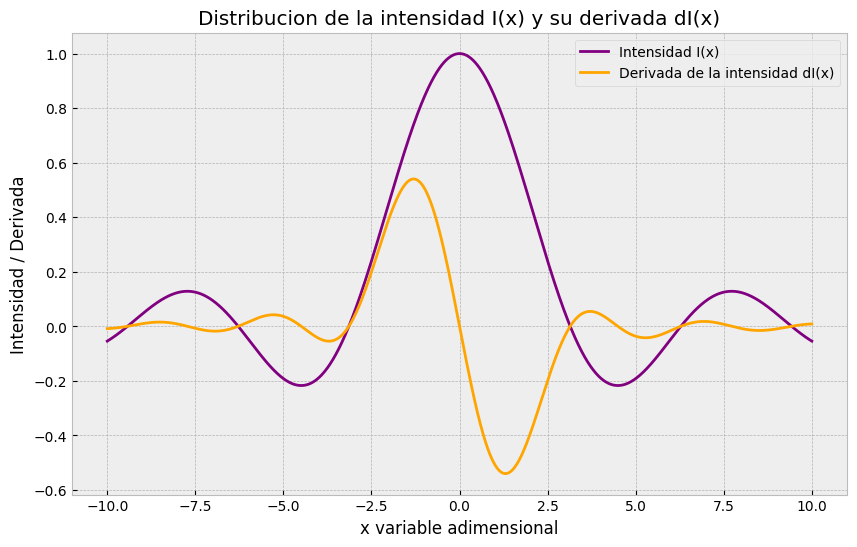

In [100]:
def I(x):
    if x == 0:
        return 1
    else:
        return (np.sin(x)/x)

def dI(x):
    if x == 0:
        return 0
    else:
        return (2 / x) * (np.cos(x) - (np.sin(x) / x)) * (np.sin(x) / x)

x = np.linspace(-10, 10, 1000)
intensidad = []
for i in x:
    intensidad.append(I(i))

dintensidad = []
for i in x:
    dintensidad.append(dI(i))

plt.style.use('bmh')
plt.figure(figsize=(10, 6))
plt.title('Distribucion de la intensidad I(x) y su derivada dI(x)')
plt.plot(x, intensidad, label='Intensidad I(x)', color='purple')
plt.plot(x, dintensidad, label='Derivada de la intensidad dI(x)', color='orange')
plt.xlabel('x variable adimensional')
plt.ylabel('Intensidad / Derivada')
plt.legend(fontsize=10)


In [166]:
def secante(f, x1, x2, maxiter=1000, tol=1e-8):
    for i in range(maxiter):
        f1, f2 = f(x1), f(x2)
        if abs(f2 - f1) < tol:
            return ValueError('Diferencia muy pequeña en f(x), no converge')  # evita división por cero
        f_nueva = x2 - ((f2*(x2-x1))/(f2-f1))
        if abs(f_nueva-x2) < tol:
            return f_nueva
        x1, x2 = x2, f_nueva
    raise ValueError(f'No converge despues de {maxiter} iterations')

f = lambda x: I(x) - 0.5
x0 = np.pi

xsol = secante(f, x0, x0 + 1)

print(f'x_1/2 donde I(x)=I0/2: {xsol:.6f}')

x_1/2 donde I(x)=I0/2: 1.895494


In [169]:
raiz = []
import scipy as sp
for i in range(0,20):
    if dI(-9.9+i)*dI(-8.9+i) <= 0:
        raiz.append(round(float(sp.optimize.newton(dI,x0=-9.9+i , x1=-8.9+i)),5))
    else:
        pass

raices = list(set(raiz))
raices.sort()
max = []
min = []

for i in range(0,len(raiz)):
    if i%2 == 0:
        min.append(raiz[i])
    else:
        max.append(raiz[i])

print('Raíces (máximos locales) de I´(x)=0 en [-10,10]: \n', max)

Raíces (máximos locales) de I´(x)=0 en [-10,10]: 
 [-7.72525, -4.49341, 0.0, 4.49341, 7.72525]


# 5.

In [177]:
h = 6.626 * 1e-34
k_b = 1.381 * 1e-23
c = 2.998 * 1e8

def lambda_0(T):
    return (h * c) / (k_b * T)

def K(T):
    return (8 * np.pi * k_b * T) / (lambda_0(T)**4)

def planck(l, T):
    x = l / lambda_0(T)
    return K(T) / (x**5 * (np.exp(1 / x) - 1))

def dplanck(l, T):
    x = l / lambda_0(T)
    num = 5 * x + (1 - 5 * x) * np.exp(1 / x)
    den = x**7 * (np.exp(1 / x) - 1)**2
    return K(T) * (num / den) * lambda_0(T)


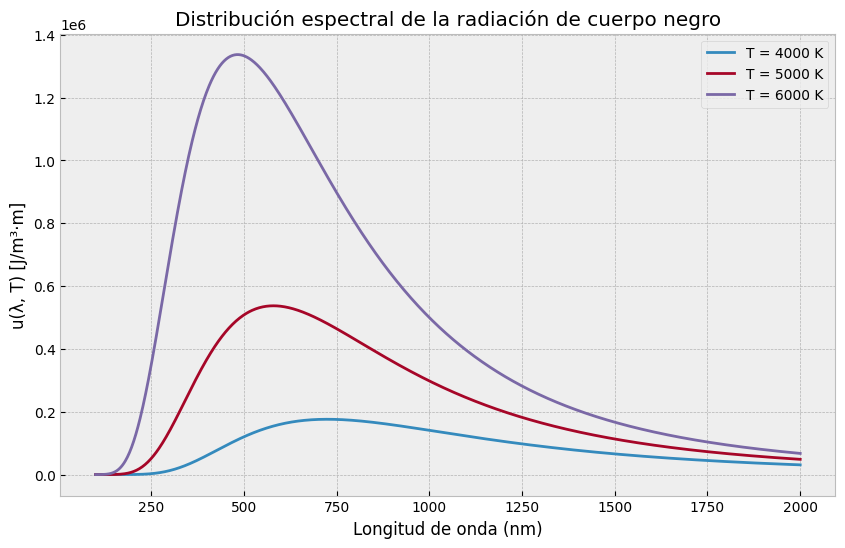

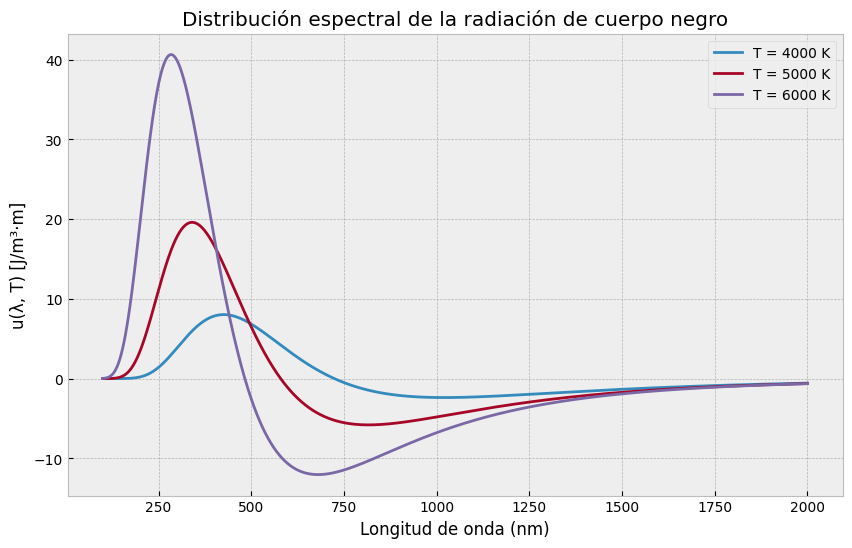

In [179]:

lam = np.linspace(100e-9, 2000e-9, 1000)

temperaturas = [4000, 5000, 6000]

plt.figure(figsize=(10, 6))
for T in temperaturas:
    u = planck(lam, T)
    plt.plot(lam * 1e9, u, label=f"T = {T} K") 

plt.title("Distribución espectral de la radiación de cuerpo negro")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("u(λ, T) [J/m³·m]")
plt.legend()
plt.grid(True)
plt.show()


lam = np.linspace(100e-9, 2000e-9, 1000)

temperaturas = [4000, 5000, 6000]

plt.figure(figsize=(10, 6))
for T in temperaturas:
    u = dplanck(lam, T)
    plt.plot(lam * 1e9, u, label=f"T = {T} K")  

plt.title("Distribución espectral de la radiación de cuerpo negro")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("u(λ, T) [J/m³·m]")
plt.legend()
plt.grid(True)
plt.show()


In [187]:
def f(x):
    return (5*x - 1) * np.exp(1/x) + 5*x

def df(x):
    exp_term = np.exp(1/x)
    return 5 + (5*x - 1) * exp_term / x**2


def newton_raphson(f, df, x1, maxiter=10000, tol=1e-5):
    for i in range(maxiter):
        f1 = f(x1)
        df1 = df(x1)
        x_nuevo = x1 - f1/df1
        if abs(x1 - x_nuevo) < tol:
            return round(x_nuevo,4)
        x1 = x_nuevo
    raise ValueError(f'No converge despues de {maxiter} iterations')

x_root = newton_raphson(f, df, 5)

print(f'Raíz de f(x): x = {x_root}')


Raíz de f(x): x = 0.0031


In [195]:
def f(x):
    return 5*x + (1 - 5*x) * np.exp(1/x)

def df(x):
    exp_term = np.exp(1/x)
    return 5 + (5*x - 1) * exp_term / x**2

def newton(f, df, x0, tol=1e-5, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            return x
        if dfx == 0:
            raise ValueError("Derivada cero.")
        x -= fx / dfx
    raise RuntimeError("No converge")

# Condición de Sol
T_sol = 5778
x_root = newton(f, df, x0=4.9)
  # Aproximadamente 4.965

print(f"Raíz de f(x): x = {x_root}")


RuntimeError: No converge

# 6.

C:\Users\majoj\AppData\Local\Temp\ipykernel_6016\1915233645.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(np.sqrt(num / den))
C:\Users\majoj\AppData\Local\Temp\ipykernel_6016\1915233645.py:14: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((V - E) / E)
C:\Users\majoj\AppData\Local\Temp\ipykernel_6016\1915233645.py:17: RuntimeWarning: invalid value encountered in sqrt
  return -(np.sqrt(E / (V - E)))


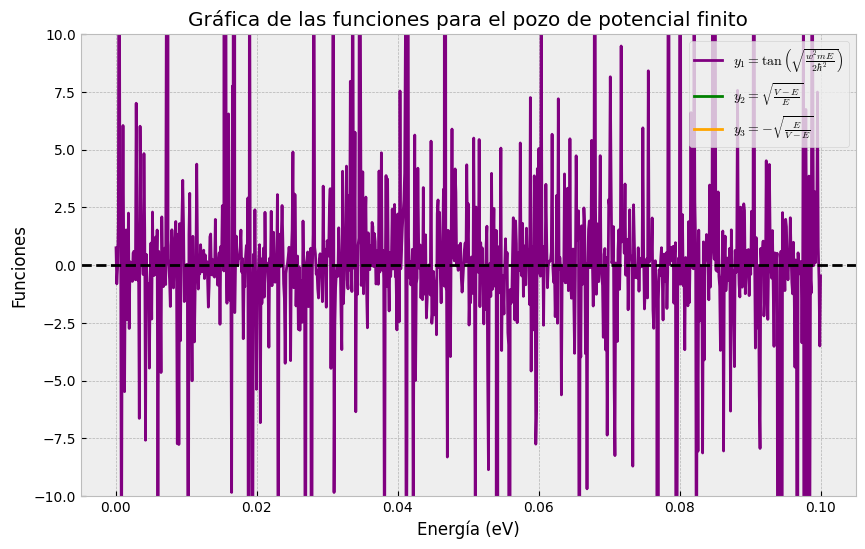

In [199]:
h = 1.055e-34
m = 9.11e-31
eV = 1.602e-19
V_ev = 20
V = V_ev * eV
w = 1e-9

def y1(E):
    num = E * m * w**2
    den = 2 * h**2
    return np.tan(np.sqrt(num / den))

def y2(E):
    return np.sqrt((V - E) / E)

def y3(E):
    return -(np.sqrt(E / (V - E)))

E = np.linspace(0.1, V - 0.01, 1000)

Y1 = y1(E)
Y2 = y2(E)
Y3 = y3(E)

plt.figure(figsize=(10, 6))
plt.plot(E, Y1, label=r'$y_1 = \tan\left(\sqrt{\frac{w^2 m E}{2 \hbar^2}}\right)$', color='purple')
plt.plot(E, Y2, label=r'$y_2 = \sqrt{\frac{V - E}{E}}$', color='green')
plt.plot(E, Y3, label=r'$y_3 = -\sqrt{\frac{E}{V - E}}$', color='orange')
plt.ylim(-10, 10)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Energía (eV)')
plt.ylabel('Funciones')
plt.title('Gráfica de las funciones para el pozo de potencial finito')
plt.legend()
plt.grid(True)


# 7.